In [1]:
import networkx as nx

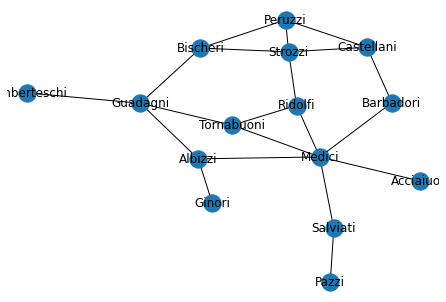

In [2]:
# Create a graph and visualize it
G = nx.florentine_families_graph()

import matplotlib.pyplot as plt
nx.draw(G,with_labels=True)

In [3]:
# DG is directed version of G. Replaces each edge {i,j} by (i,j) and (j,i)
DG = nx.DiGraph(G)

# Suppose unit arc costs
c = { (i,j) : 1 for (i,j) in DG.edges }

s = "Strozzi"  # path start
t = "Ginori"   # path end

In [4]:
import gurobipy as gp
from gurobipy import GRB

In [5]:
# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars( DG.edges )

# Objective function: minimize cost of selected edges
m.setObjective( gp.quicksum( c[i,j] * x[i,j] for i,j in DG.edges ), GRB.MINIMIZE )

# Add flow-balance constraints at all nodes (besides s and t)
m.addConstrs( gp.quicksum( x[j,i] - x[i,j] for j in DG.neighbors(i) ) == 0 for i in G.nodes if i not in {s,t} )

# Must leave node s, and must not enter s
m.addConstr( gp.quicksum( x[s,j] for j in DG.neighbors(s) ) == 1 )
m.addConstr( gp.quicksum( x[i,s] for i in DG.neighbors(s) ) == 0 )

# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 15 rows, 40 columns and 78 nonzeros
Model fingerprint: 0xa0d6bf2b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 14 columns
Presolve time: 0.03s
Presolved: 9 rows, 26 columns, 50 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+00   1.000000e+00   0.000000e+00      0s
Extra simplex iterations after uncrush: 3
       8    4.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.06 seconds
Optimal objective  4.000000000e+00


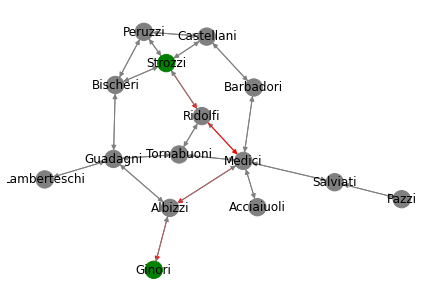

In [8]:
# Visualize the solution
path_edges = [ (i,j) for i,j in DG.edges if x[i,j].x > 0.5 ]

edge_colors = [ "red" if i in path_edges else "gray" for i in DG.edges ]
node_colors = [ "green" if i in {s,t} else "gray" for i in DG.nodes ]

nx.draw( DG, with_labels=True, edge_color=edge_colors, node_color=node_colors )